In [1]:
import tensorflow as tf
tf.random.set_seed(0)

from tensorflow import keras
from tensorflow.keras import layers, models, Input
from tensorflow.keras.preprocessing import image_dataset_from_directory


from keras.datasets import mnist
from keras.models import load_model

import numpy as np
import matplotlib.pyplot as plt
import random
import os

In [2]:
classes = ["apple", "avocado", "banana", "cherry", "kiwi", "mango", "orange", "pinenaple", "strawberries", "watermelon"]
len(classes)

10

In [3]:
def read_data(filepath):
    dataset = image_dataset_from_directory(
        filepath,
        image_size=(224, 224),
        batch_size=32,
        label_mode='int'
    )
    
    images = []
    labels = []
    for image_batch, label_batch in dataset:
        images.append(image_batch.numpy())
        labels.append(label_batch.numpy())
    
    # Chuyển đổi danh sách thành mảng numpy bằng cách dùng np.concatenate
    X = np.concatenate(images, axis=0).astype(np.uint8)
    y = np.concatenate(labels, axis=0).astype(np.uint8)
    
    return X, y

In [4]:
X, y = read_data('predict_labeled')

Found 48 files belonging to 10 classes.


In [5]:
X_predict = X.astype(np.float32) / 255
y_labels = keras.utils.to_categorical(y)

In [6]:
X_predict.shape, y_labels.shape

((48, 224, 224, 3), (48, 10))

In [8]:
model = load_model('classify-fruit.keras')

In [9]:
score = model.evaluate(X_predict, y_labels)

2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 219ms/step - accuracy: 0.9757 - loss: 0.3149


In [10]:
score

[0.29826268553733826, 0.9791666865348816]

In [11]:
y_predict = model.predict(X_predict)
predicted_classes = np.argmax(y_predict, axis=1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step


In [15]:
def plot_data(x_data: np.ndarray, y_data: np.ndarray) -> None:
    nrows, ncols = 2, 4
    fig, axes = plt.subplots(nrows, ncols, figsize=(8, 4))
    
    len_x = x_data.shape[0]
    
    for i in range(nrows * ncols):
        ax = axes[i // ncols, i % ncols]
        
        img_index = random.randint(0, len_x  - 1)
        
        ax.imshow(x_data[img_index])
        ax.set(xticks=[], yticks=[])
        
        true_label_str = 'Dự đoán: ' + classes[y_data[img_index]]
        ax.set_xlabel(true_label_str, color='green', fontsize = 12)
    plt.tight_layout()
    plt.show()

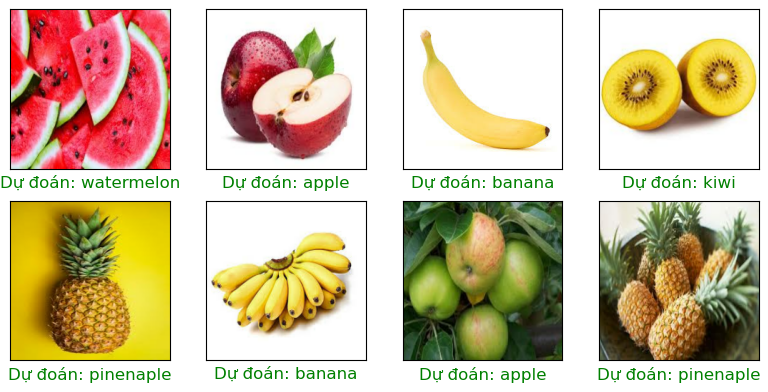

In [17]:
plot_data(X_predict, predicted_classes)